In [1]:
# Import

import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

Generate data

In [2]:
N = 1500
t = np.arange(0, N)

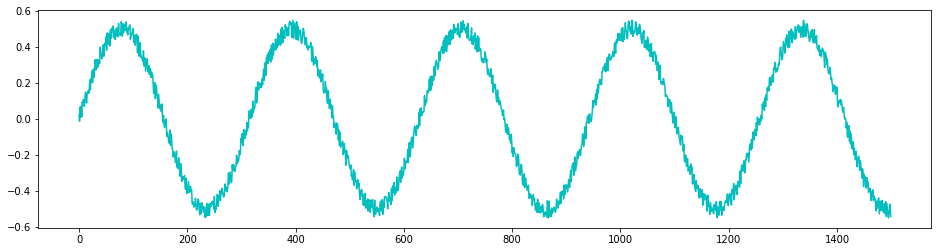

In [3]:
# Sine Signal

data_sine = np.sin(t * 0.02)/2 + np.random.uniform(-0.05, 0.05, N)
plt.figure(figsize=(16, 4))
plt.plot(data_sine, 'c')
plt.show()

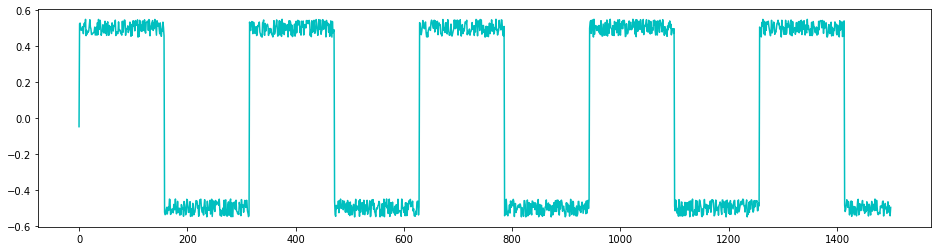

In [4]:
# Square Signal

data_square = np.sign(np.sin(t * 0.02))/2 + np.random.uniform(-0.05, 0.05, N)
plt.figure(figsize=(16, 4))
plt.plot(data_square, 'c')
plt.show()

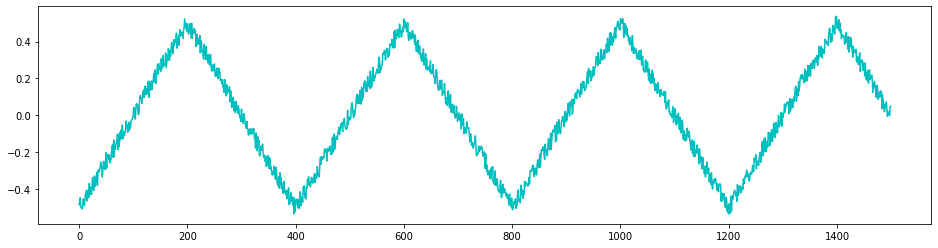

In [5]:
# Triangle Signal

P = 200
A = 2
data_triangle = ((A/P) * (P - np.abs(t % (2*P) - P)) - 1) / 2 + np.random.uniform(-0.05, 0.05, N)

plt.figure(figsize=(16, 4))
plt.plot(data_triangle, 'c')
plt.show()

In [6]:
# Sampeling and Convert Signal to Dataset

def convertSignalToDataset(signal, step, label):
  X = []
  Y = []

  for i in range(len(signal) - step):
    j = i + step
    X.append(signal[i:j])
    Y.append(label)

  return np.array(X), np.array(Y)

In [7]:
# Step is Hyperparameter

X_sine, Y_sine = convertSignalToDataset(data_sine, 40, 0)
X_square, Y_square = convertSignalToDataset(data_square, 40, 1)
X_triangle, Y_triangle = convertSignalToDataset(data_triangle, 40, 2)

In [8]:
X_sine.shape, Y_sine.shape

((1460, 40), (1460,))

In [9]:
X = np.concatenate((X_sine, X_square, X_triangle), axis = 0)
Y = np.concatenate((Y_sine, Y_square, Y_triangle), axis = 0)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [10]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

X_train.shape, X_test.shape

((3504, 40, 1), (876, 40, 1))

### Define Model, Fit and Compile

In [11]:
model = tf.keras.models.Sequential([
          layers.SimpleRNN(units=64, input_shape=(None, 1)),
          layers.Dense(3, activation="softmax")
])

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=["accuracy"])

In [ ]:
model.fit(X_train, Y_train, epochs=100, batch_size=16)

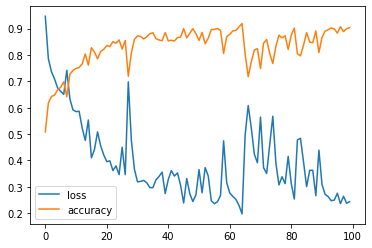

In [14]:
history = pd.DataFrame(model.history.history)
history.plot()

### Evaluate and Inference

In [15]:
# Evaluate

model.evaluate(X_test, Y_test)

28/28 [==============================] - 1s 8ms/step - loss: 0.1963 - accuracy: 0.9212


[0.19631260633468628, 0.9212328791618347]

In [16]:
# Inference on Sine Signal

N = 40
t = np.arange(0, N)

x = np.sin(t * 0.02)/2 + np.random.uniform(-0.05, 0.05, N)
x = x.reshape(1, -1, 1)

result = np.argmax(model.predict(x))
print("Result for Sin Signal: ", result)

Result for Sin Signal:  0


In [22]:
# Inference on Sequare Signal

N = 40
t = np.arange(0, N)

x = np.sign(np.sin(t * 0.02))/2 + np.random.uniform(-0.05, 0.05, N)
x = x.reshape(1, -1, 1)

result = np.argmax(model.predict(x))
print("Result for Sequare Signal: ", result)

Result for Sequare Signal:  1


In [24]:
# Inference on Triangle Signal

N = 40
t = np.arange(0, N)

x = ((A/P) * (P - np.abs(t % (2*P) - P)) - 1) / 2 + np.random.uniform(-0.05, 0.05, N)
x = x.reshape(1, -1, 1)

result = np.argmax(model.predict(x))
print("Result for Triangle Signal: ", result)

Result for Triangle Signal:  2
